In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_excel('d:/dataset/housepricing.xlsx')
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,4,5,10,3370,280,1921,2,58,2380000
1,4,2.50,2920,4000,1.5,0,5,8,1910,1010,1909,2,51,1400000
2,5,2.75,2910,9480,1.5,0,3,8,2910,0,1939,1,53,1200000
3,4,2.50,3310,42998,2.0,0,3,9,3310,0,2001,3,76,838000
4,3,2.00,2710,4500,1.5,0,4,8,1880,830,1929,1,51,805000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   number of views                        14620 non-null  int64  
 6   condition of the house                 14620 non-null  int64  
 7   grade of the house                     14620 non-null  int64  
 8   Area of the house(excluding basement)  14620 non-null  int64  
 9   Area of the basement                   14620 non-null  int64  
 10  Built Year                             14620 non-null  int64  
 11  Nu

In [6]:
df=df.astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   number of bedrooms                     14620 non-null  int32
 1   number of bathrooms                    14620 non-null  int32
 2   living area                            14620 non-null  int32
 3   lot area                               14620 non-null  int32
 4   number of floors                       14620 non-null  int32
 5   number of views                        14620 non-null  int32
 6   condition of the house                 14620 non-null  int32
 7   grade of the house                     14620 non-null  int32
 8   Area of the house(excluding basement)  14620 non-null  int32
 9   Area of the basement                   14620 non-null  int32
 10  Built Year                             14620 non-null  int32
 11  Number of schools nearby    

In [8]:
X=df.drop(columns=['Price']).values
y=df['Price'].values

In [9]:
X

array([[   5,    2, 3650, ..., 1921,    2,   58],
       [   4,    2, 2920, ..., 1909,    2,   51],
       [   5,    2, 2910, ..., 1939,    1,   53],
       ...,
       [   2,    1, 1070, ..., 1962,    2,   64],
       [   4,    1, 1030, ..., 1955,    3,   54],
       [   3,    1,  900, ..., 1969,    2,   55]])

In [10]:
y

array([2380000, 1400000, 1200000, ...,  209000,  205000,  146000])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


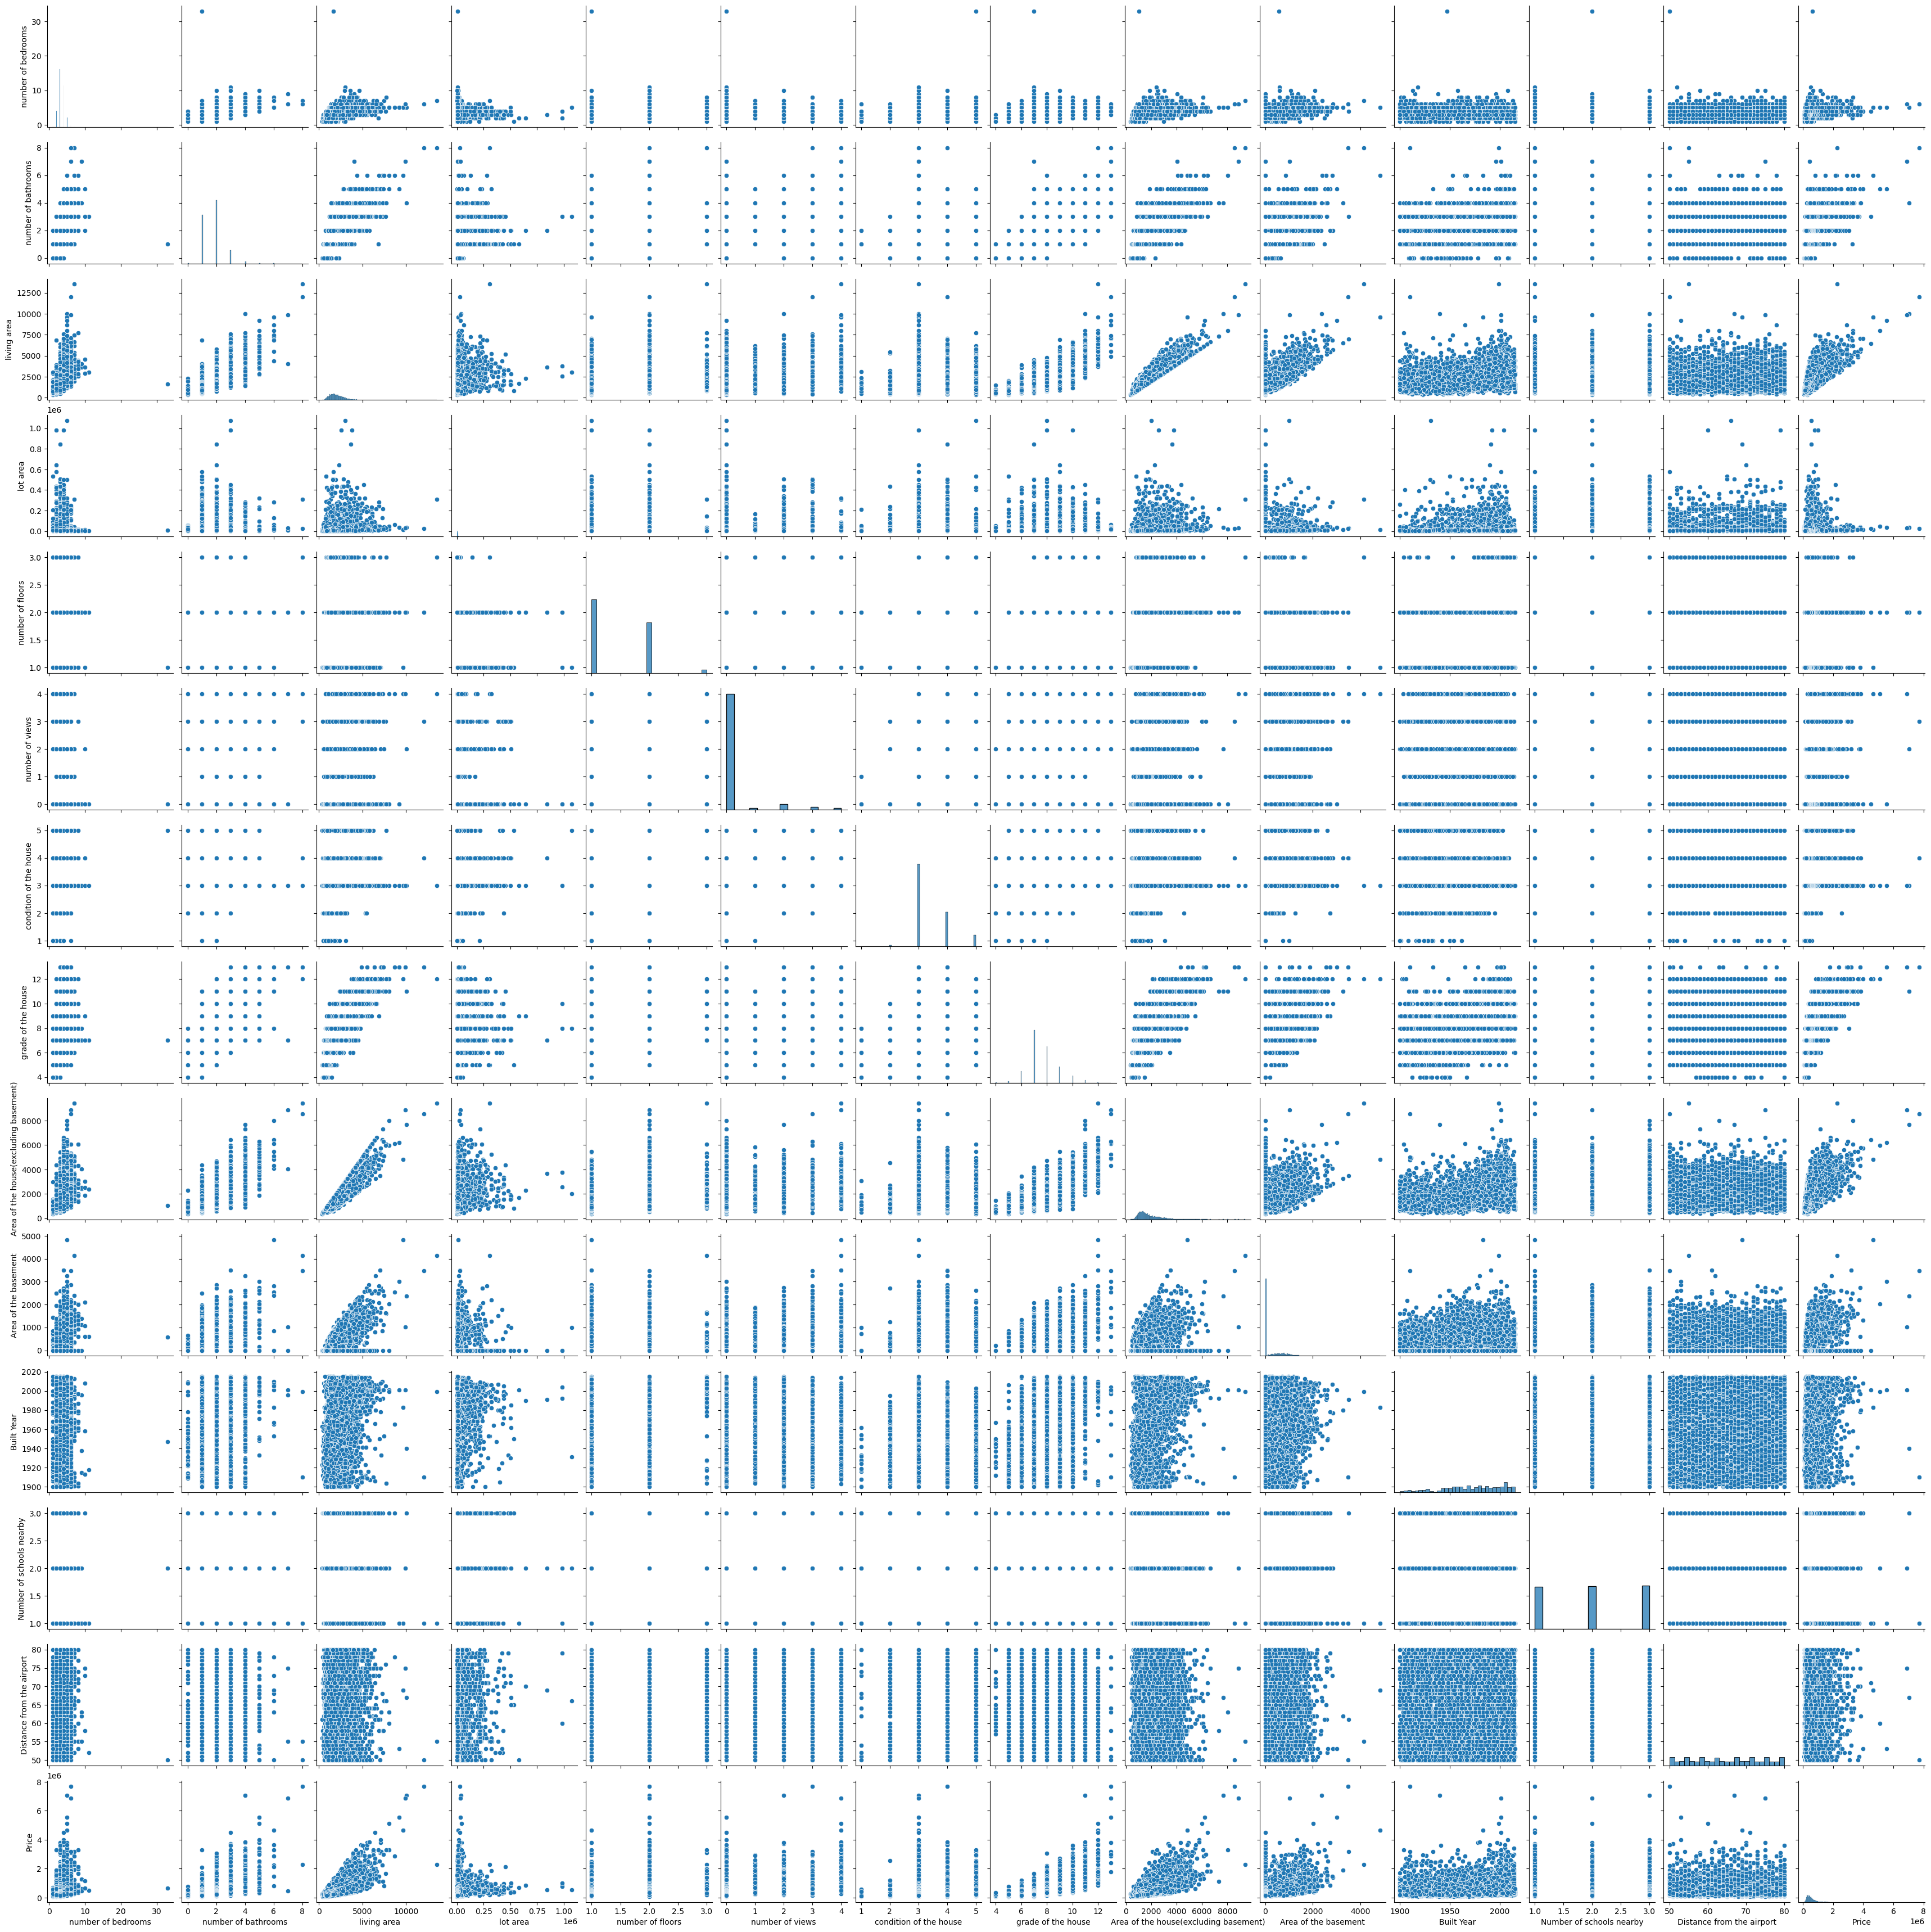

In [11]:
sn.pairplot(df)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/5,random_state=0)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11696, 13)
(2924, 13)
(11696,)
(2924,)


In [14]:
y_test

array([ 269000, 1160000,  410000, ...,  544500,  260000,  405000])

In [15]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

In [16]:
lrm.coef_

array([-3.89590905e+04,  5.05397685e+04,  1.14867165e+02, -3.64848514e-01,
        2.41624548e+04,  6.88957805e+04,  2.32969874e+04,  1.21366839e+05,
        6.24624242e+01,  5.24047403e+01, -3.51485207e+03,  1.86700386e+03,
        1.30503387e+00])

In [17]:
lrm.intercept_

6078214.437010578

In [18]:
y_pred = lrm.predict(X_test)
print(y_pred)

[ 238838.14363692 1291599.24649987  499226.24613834 ...  464843.79378953
  535800.26938175  238811.7499417 ]


In [19]:
df1=pd.DataFrame(y_pred,columns=['Predicted Price'])
df2=pd.DataFrame(y_test,columns=['Original Price'])

In [20]:
df1

,Predicted Price
0,2.388381e+05
1,1.291599e+06
2,4.992262e+05
3,5.702956e+05
4,5.340601e+05
...,...
2919,1.436500e+06
2920,4.674295e+05
2921,4.648438e+05
2922,5.358003e+05


In [21]:
df2

,Original Price
0,269000
1,1160000
2,410000
3,540000
4,657500
...,...
2919,1250000
2920,525000
2921,544500
2922,260000


In [22]:
pd.concat([df1,df2],axis=1)

,Predicted Price,Original Price
0,2.388381e+05,269000
1,1.291599e+06,1160000
2,4.992262e+05,410000
3,5.702956e+05,540000
4,5.340601e+05,657500
...,...,...
2919,1.436500e+06,1250000
2920,4.674295e+05,525000
2921,4.648438e+05,544500
2922,5.358003e+05,260000


In [24]:
from sklearn import metrics

R2=metrics.r2_score(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
MAE=metrics.mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print("R2 = ",R2)
print("MSE = ",MSE)
print("MAE =",MAE)
print("RMSE =",RMSE)

R2 =  0.6336225122938417
MSE =  50852680463.953064
MAE = 139912.90833616693
RMSE = 225505.38899093535
